In [1]:
import FinanceDataReader as fdr
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
list = fdr.StockListing('KRX') 

In [3]:
def getDatatoFinance(company,list, start, end):
    companysymbol = list.loc[list.Name == company, ['Symbol']]
    return fdr.DataReader(companysymbol, start, end )

In [4]:
def culculate(company):
    companydata = getDatatoFinance(company,)
    
    companyDayReturn = (company['Close'] / company['Close'].shift(1)).fillna(1) 
    companyCumulativeReturn = companyDayReturn.cumprod() 
    companyCagr = companyCumulativeReturn.iloc[-1] ** (252/len(company))
    companycumReturnMax = companyCumulativeReturn.cummax() 
    companyDd = (companyCumulativeReturn.cummax() - companyCumulativeReturn) / companyCumulativeReturn.cummax() * 100
    companyMdd = companyDd.max()
    return companyCumulativeReturn, companyDd

In [25]:
# 데이터 가져오기
stocks = [samsung, kakao, sk, naver, hyundai]

samsung = fdr.DataReader("005930", "2017", "2022-9-10")
kakao = fdr.DataReader("035720", "2017", "2022-9-10")
sk = fdr.DataReader("034730", "2017", "2022-9-10")
naver = fdr.DataReader("035420", "2017", "2022-9-10")
hyundai = fdr.DataReader("005380", "2017", "2022-9-10")

In [24]:
# 결측치 검사, 데이터에 결측치는 없다. 바로 사용해도 무방할듯
print(pd.isnull(samsung).sum())
print(pd.isnull(kakao).sum())
print(pd.isnull(sk).sum())
print(pd.isnull(naver).sum())
print(pd.isnull(hyundai).sum())


Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64


#  1. 단일 종목 투자성과

In [21]:
def culculate(company):
    companydata = getDatatoFinance(company,)
    
    companyDayReturn = (company['Close'] / company['Close'].shift(1)).fillna(1) 
    companyCumulativeReturn = companyDayReturn.cumprod() 
    companyCagr = companyCumulativeReturn.iloc[-1] ** (252/len(company))
    companycumReturnMax = companyCumulativeReturn.cummax() 
    companyDd = (companyCumulativeReturn.cummax() - companyCumulativeReturn) / companyCumulativeReturn.cummax() * 100
    companyMdd = companyDd.max()
    return companyCumulativeReturn, companyDd

In [ ]:
def graph(company):
    

In [26]:
samsungCumulativeReturn, samsungDd = culculate(samsung)
kakaoCumulativeReturn, kakaoDd = culculate(kakao)
skCumulativeReturn, skDd = culculate(sk)
naverCumulativeReturn, naverDd = culculate(naver)
hyundaiCumulativeReturn, hyundaiDd = culculate(hyundai)

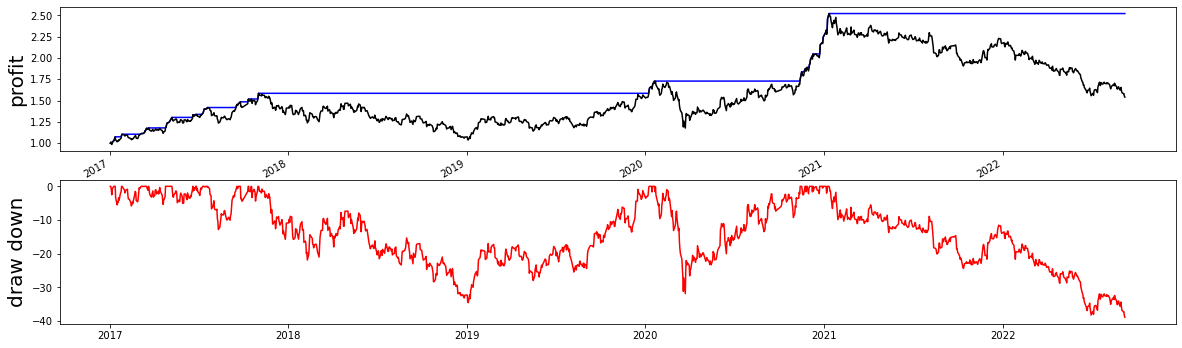

In [11]:
# 시각화
plt.figure(figsize=(20, 10))

# 수익곡선
plt.subplot(3, 1, 1)
cumReturnMax.plot(color="blue")
samsungCumulativeReturn.plot(color="black")
plt.ylabel("profit", fontsize=20)

# 낙폭곡선
plt.subplot(3, 1, 2)
plt.plot(-samsungDd, color="red")
plt.ylabel("draw down", fontsize=20)
plt.show()


# 2개 종목 종가를 하나의 데이터프레임으로 합치기

In [16]:
stocks = [samsung, kakao,sk,naver,hyundai]

data = pd.DataFrame()

for stock in stocks:
    data = pd.concat([data, stock['Close']], axis=1)
    
data.columns = ['samsung', 'kakao','sk','naver','hyundai']

data

,samsung,kakao,sk,naver,hyundai
2017-01-02,36100,15394,230000,155620,150000
2017-01-03,36480,16057,229000,153617,153000
2017-01-04,36160,16920,227000,162230,154000
2017-01-05,35560,16860,233000,158424,153500
2017-01-06,36200,16800,232500,160026,151000
...,...,...,...,...,...
2022-09-02,57500,70200,224500,234000,196500
2022-09-05,57100,70000,225000,236000,200000
2022-09-06,57100,69700,221000,235000,201000
2022-09-07,56000,67500,219000,231500,202000


In [18]:
dayReturn = (data / data.shift(1)).fillna(1)
dayReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,0.995652,0.987129,1.020000
2017-01-04,0.991228,1.053746,0.991266,1.056068,1.006536
2017-01-05,0.983407,0.996454,1.026432,0.976539,0.996753
2017-01-06,1.017998,0.996441,0.997854,1.010112,0.983713
...,...,...,...,...,...
2022-09-02,0.984589,0.983193,1.004474,0.991525,1.005115
2022-09-05,0.993043,0.997151,1.002227,1.008547,1.017812
2022-09-06,1.000000,0.995714,0.982222,0.995763,1.005000
2022-09-07,0.980736,0.968436,0.990950,0.985106,1.004975


In [19]:
tmp =  data.iloc[0] 

In [20]:
cumReturn = data / data.iloc[0] 
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,0.995652,0.987129,1.020000
2017-01-04,1.001662,1.099130,0.986957,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.013043,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.010870,1.028313,1.006667
...,...,...,...,...,...
2022-09-02,1.592798,4.560218,0.976087,1.503663,1.310000
2022-09-05,1.581717,4.547226,0.978261,1.516515,1.333333
2022-09-06,1.581717,4.527738,0.960870,1.510089,1.340000
2022-09-07,1.551247,4.384825,0.952174,1.487598,1.346667


In [23]:
portWeight = [1/len(data.columns)] * len(data.columns) 
portWeight

[0.2, 0.2, 0.2, 0.2, 0.2]

In [24]:
# 누적 수익률 5:5로 계산
portCumReturn = (portWeight * cumReturn).sum(axis=1) # axis = 1은 열단위 연산. 첫열의 값 X 0.5 + 두번째 열의 값 x 0.5 
portCumReturn

2017-01-02    1.000000
2017-01-03    1.011275
2017-01-04    1.031378
2017-01-05    1.026934
2017-01-06    1.027991
                ...   
2022-09-02    1.988553
2022-09-05    1.991410
2022-09-06    1.984083
2022-09-07    1.944502
2022-09-08    1.946550
Length: 1399, dtype: float64

## 일간 수익률

### 간단한 방법 -> 역연산

In [25]:
# 1.050396 / 1.026798(shift(1)) = 1.022982

portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)  
portDayReturn

2017-01-02    1.000000
2017-01-03    1.011275
2017-01-04    1.019879
2017-01-05    0.995691
2017-01-06    1.001029
                ...   
2022-09-02    0.989577
2022-09-05    1.001437
2022-09-06    0.996320
2022-09-07    0.980051
2022-09-08    1.001053
Length: 1399, dtype: float64

# 분산투자 포트폴리오와 개별 종목 투자 결과 비교

In [26]:
# 개별 자산 누적수익률
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,0.995652,0.987129,1.020000
2017-01-04,1.001662,1.099130,0.986957,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.013043,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.010870,1.028313,1.006667
...,...,...,...,...,...
2022-09-02,1.592798,4.560218,0.976087,1.503663,1.310000
2022-09-05,1.581717,4.547226,0.978261,1.516515,1.333333
2022-09-06,1.581717,4.527738,0.960870,1.510089,1.340000
2022-09-07,1.551247,4.384825,0.952174,1.487598,1.346667


samsung
cagr: 1.0809019472154229
mdd: 38.901098901098905
kakao
cagr: 1.3068066793980364
mdd: 60.41297935103245
portfolio
cagr: 1.2172695225374384
mdd: 55.186771115934654


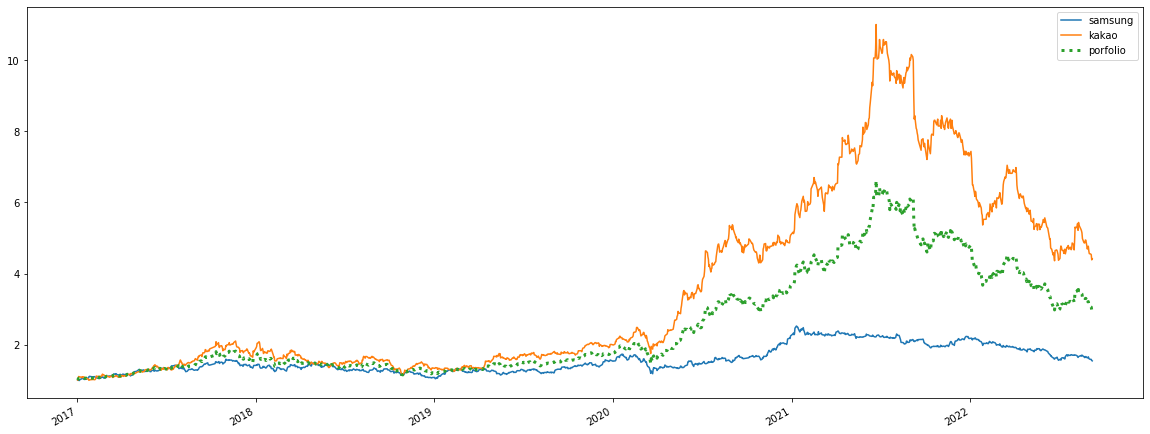

In [41]:
plt.figure(figsize=(20, 8))

for stock in cumReturn.columns:
    # 그래프
    cumReturn[stock].plot(label=stock)
    # cagr
    cagr = cumReturn[stock].iloc[-1] ** (252/len(cumReturn[stock]))
    # mdd
    dd = (cumReturn[stock].cummax() - cumReturn[stock]) / cumReturn[stock].cummax() * 100
    
    mdd= dd.max()
    
    print(stock)
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")  

# cagr
cagr = portCumReturn.iloc[-1] ** (252/len(portCumReturn))
# mdd
dd = (portCumReturn.cummax() - portCumReturn) / portCumReturn.cummax() * 100
mdd= dd.max()

print("portfolio") # 50:50 종목을 담은 것을 의미
print(f"cagr: {cagr}\nmdd: {mdd}")
print("=======")

portCumReturn.plot(label = "porfolio", linestyle="dotted", linewidth=3)
plt.legend()
plt.show()

# DD 그림 그리기